In [1]:
"""
Name: con_realistic_example.ipynb
Authors: Stephan Meighen-Berger
Example of the realistic simulations that can be done
"""
%load_ext autoreload
%autoreload 2

In [1]:
# General imports
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy.signal import savgol_filter
from tqdm import tqdm
import pandas as pd

In [2]:
# Latex text rendering
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [3]:
# Adding path to module
sys.path.append("../")

In [4]:
# picture path
PICS = '../pics/'

In [7]:
# Module imports
from contagion import Contagion, config
print(config)

{'debug level': 30, 'log file handler': '../run/contagion.log', 'config location': '../run/config.txt', 'population size': 10000, 'simulation length': 200, 'infected': 10, 'pdf move': 'gauss', 'random state': RandomState(MT19937) at 0x234B6AF8A40, 'average social circle': 20, 'variance social circle': 5, 'social circle pdf': 'gauss', 'mean social circle interactions': 0.2, 'variance social circle interactions': 2, 'social circle interactions pdf': 'gauss', 'infection probability pdf': 'intensity', 'infection duration mean': 20, 'infection duration variance': 5, 'infection duration pdf': 'gauss', 'infectious duration mean': 3, 'infectious duration variance': 5, 'infectious duration pdf': 'gauss', 'incubation duration mean': 5, 'incubation duration variance': 2, 'incubation duration pdf': 'gauss', 'measures': 'none', 'tracked': 0.2, 'interaction intensity': 'uniform', 'incubation period': 1, 'immunity duration': -1, 'dimensions': 2, 'geometry': 'box', 'box size': 100.0, 'sphere diameter'

In [18]:
# Creating a contagion object
contagion = Contagion()

In [53]:
# Storing the solutions
contagion.sim()

In [54]:
stats= pd.DataFrame(contagion.statistics)

In [55]:
# Plotting standards
std_size = 10.
fontsize = 20.
lw=3.
h_length=1.

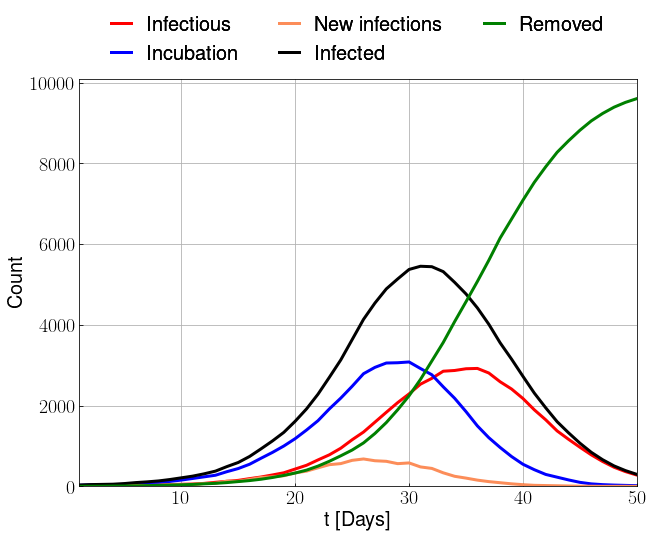

In [59]:
# Infections per time step
figure, ax = plt.subplots(figsize=(std_size, std_size * 6. / 8.))
colors = ['#fdcc8a',
          '#fc8d59',
          '#d7301f']
ax.plot(contagion.t, contagion.statistics['infectious'],
        lw=lw, label='Infectious', color='r')
ax.plot(contagion.t, contagion.statistics['incubation'],
        lw=lw, label='Incubation', color='b')
ax.plot(contagion.t, contagion.statistics['infections'],
        lw=lw, label='New infections', color=colors[1])
ax.plot(contagion.t, contagion.statistics['infected'],
        lw=lw, label='Infected', color="k")
ax.plot(contagion.t, contagion.statistics['removed'],
        lw=lw, label='Removed', color='g')
ax.set_xlim(1e0, 50)
ax.set_ylim(0., config['population size'] * 1.01)
ax.set_xscale('linear')
ax.set_yscale('linear')
ax.set_xlabel(r't [Days]', fontsize=fontsize)
ax.set_ylabel(r'Count', fontsize=fontsize)
ax.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
h, l = ax.get_legend_handles_labels()
lgd1 = ax.legend(h,l, loc=9, bbox_to_anchor=(0.5, +1.2),
                 ncol=3, fontsize=fontsize, handlelength=h_length,
                 fancybox=True, frameon=False)
ax.add_artist(lgd1)
plt.grid(True)
plt.show()

In [60]:
figure.savefig(PICS + "Contagion_Example.png",
               bbox_inches='tight')